In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('sortedGameLogs.csv')
df=df.drop(columns='Unnamed: 0')
df.head(),df.info()

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG,MIN_SEC
0,2023-24,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,22300015,2023-11-10T00:00:00,LAL @ PHX,...,6163,134,628,10350,616,1,138,475,1,36:23
1,2023-24,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,22300026,2023-11-14T00:00:00,LAL vs. MEM,...,6163,11166,6105,2411,5135,2248,138,4037,1,22:39
2,2023-24,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,22300036,2023-11-17T00:00:00,LAL @ POR,...,18879,2625,344,1570,530,2248,138,351,1,34:32
3,2023-24,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,22300042,2023-11-21T00:00:00,LAL vs. UTA,...,1,11166,5445,2754,4380,2248,138,4037,1,24:01
4,2023-24,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,22300061,2023-10-24T00:00:00,LAL @ DEN,...,6163,11166,3398,6299,3036,2248,138,3693,1,29:01


In [28]:
print(df[['PLAYER_ID','GAME_ID','PTS', 'REB', 'AST', 'MIN', 'FGA', 'FG3A', 'FTA', 'TOV']])

       PLAYER_ID   GAME_ID  PTS  REB  AST        MIN  FGA  FG3A  FTA  TOV
0           2544  22300015   32   11    6  36.383333   17     4   11    4
1           2544  22300026   16    9    6  22.650000   11     6    2    4
2           2544  22300036   35    5    9  34.533333   22     9    6    3
3           2544  22300042   17    7    9  24.016667   10     5    2    2
4           2544  22300061   21    8    5  29.010000   16     4    1    0
...          ...       ...  ...  ...  ...        ...  ...   ...  ...  ...
26396    1642013  22301137    0    2    0   4.666667    0     0    0    0
26397    1642013  22301146    6    9    0  14.200000    8     1    2    0
26398    1642013  22301160    7   14    1  24.116667   10     1    0    1
26399    1642013  22301176    0    4    0  19.100000    2     0    0    1
26400    1642013  22301189    6    4    0  11.108333    7     1    0    0

[26401 rows x 10 columns]


Epoch 1/100


/Users/jamesstevens/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


576/576 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9541 - mae: 0.7428 - val_loss: 0.4453 - val_mae: 0.5315 - learning_rate: 0.0010
Epoch 2/100
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6573 - mae: 0.6186 - val_loss: 0.3837 - val_mae: 0.4694 - learning_rate: 0.0010
Epoch 3/100
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6316 - mae: 0.6057 - val_loss: 0.3861 - val_mae: 0.4730 - learning_rate: 0.0010
Epoch 4/100
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6158 - mae: 0.5974 - val_loss: 0.3829 - val_mae: 0.4635 - learning_rate: 0.0010
Epoch 5/100
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6075 - mae: 0.5935 - val_loss: 0.3872 - val_mae: 0.4814 - learning_rate: 0.0010
Epoch 6/100
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6037 - mae: 0.5906 - val_loss: 0.3768 - val_mae: 0.4625 - learning_rate: 0.0010
Epoch 7/100
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6032 - mae: 0.5903 - val_loss: 0.3747 - val_mae: 0.4570 - learning_rate: 0.0010
Epoch 8/100

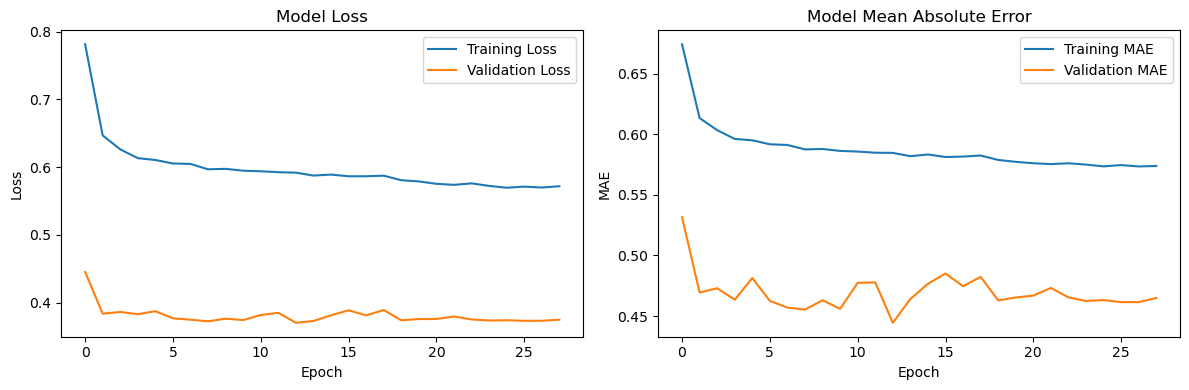

In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def prepare_multi_player_sequences(df, features, sequence_length, min_games_per_player=10):
    """
    Prepare time series sequences for multiple players
    
    Args:
    - df: DataFrame with player game-level data
    - features: List of feature columns to use
    - sequence_length: Number of previous games to use for prediction
    - min_games_per_player: Minimum games a player must have to be included
    
    Returns:
    - X: Input sequences
    - y: Target sequences
    - scaler: Feature scaler
    """
    # Sort data chronologically for each player
    df_sorted = df.sort_values(['PLAYER_ID', 'GAME_ID'])
    
    # Filter players with sufficient game history
    player_game_counts = df_sorted['PLAYER_ID'].value_counts()
    valid_players = player_game_counts[player_game_counts >= min_games_per_player].index
    
    df_filtered = df_sorted[df_sorted['PLAYER_ID'].isin(valid_players)]
    
    # Standardize features across ALL players
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df_filtered[features])
    
    # Prepare sequences
    sequences_X, sequences_y = [], []
    
    for player_id in valid_players:
        player_data = scaled_features[df_filtered['PLAYER_ID'] == player_id]
        
        # Create sequences for this player
        for i in range(len(player_data) - sequence_length):
            sequences_X.append(player_data[i:i+sequence_length])
            sequences_y.append(player_data[i+sequence_length])
    
    return (np.array(sequences_X), 
            np.array(sequences_y), 
            scaler)

def create_lstm_model(sequence_length, num_features):
    """
    Create LSTM model for time series prediction
    
    Args:
    - sequence_length: Number of time steps in input sequence
    - num_features: Number of features to predict
    
    Returns:
    - Compiled Keras model
    """
    model = Sequential([
        LSTM(64, 
             input_shape=(sequence_length, num_features), 
             return_sequences=True,
             activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        
        LSTM(32, return_sequences=False),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(num_features)
    ])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='mean_squared_error',
        metrics=['mae']
    )
    
    return model

def train_time_series_model(X, y, test_size=0.2, epochs=100):
    """
    Train and evaluate time series model
    
    Args:
    - X: Input sequences
    - y: Target sequences
    - test_size: Proportion of data for validation
    - epochs: Maximum training epochs
    
    Returns:
    - Trained model
    - Training history
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, shuffle=False
    )
    
    # Model and callbacks
    model = create_lstm_model(X.shape[1], X.shape[2])
    
    early_stopping = EarlyStopping(
        monitor='val_loss', 
        patience=15, 
        restore_best_weights=True
    )
    
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss', 
        factor=0.2, 
        patience=5, 
        min_lr=0.00001
    )
    
    # Train model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=epochs,
        batch_size=32,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )
    
    return model, history

# Example usage
features = ['PTS', 'REB', 'AST', 'MIN', 'FGA', 'FG3A', 'FTA', 'TOV']
sequence_length = 5

# Prepare sequences
X, y, scaler = prepare_multi_player_sequences(
    df, 
    features=features, 
    sequence_length=sequence_length,
    min_games_per_player=20  # Adjust based on your dataset
)

# Train model
model, history = train_time_series_model(X, y)

# Optional: Visualization of training
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/100


/Users/jamesstevens/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


478/478 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.9960 - mae: 0.7582 - val_loss: 0.4841 - val_mae: 0.5384 - learning_rate: 0.0010
Epoch 2/100
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6570 - mae: 0.6191 - val_loss: 0.4680 - val_mae: 0.5219 - learning_rate: 0.0010
Epoch 3/100
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6278 - mae: 0.6053 - val_loss: 0.4695 - val_mae: 0.5264 - learning_rate: 0.0010
Epoch 4/100
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6167 - mae: 0.5995 - val_loss: 0.4678 - val_mae: 0.5201 - learning_rate: 0.0010
Epoch 5/100
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6132 - mae: 0.5976 - val_loss: 0.4668 - val_mae: 0.5266 - learning_rate: 0.0010
Epoch 6/100
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5977 - mae: 0.5909 - val_loss: 0.4518 - val_mae: 0.5153 - learning_rate: 0.0010
Epoch 7/100
478/478 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5920 - mae: 0.5875 - val_loss: 0.4531 - val_mae: 0.5085 - learning_rate: 0.0010
Epoch 8/100

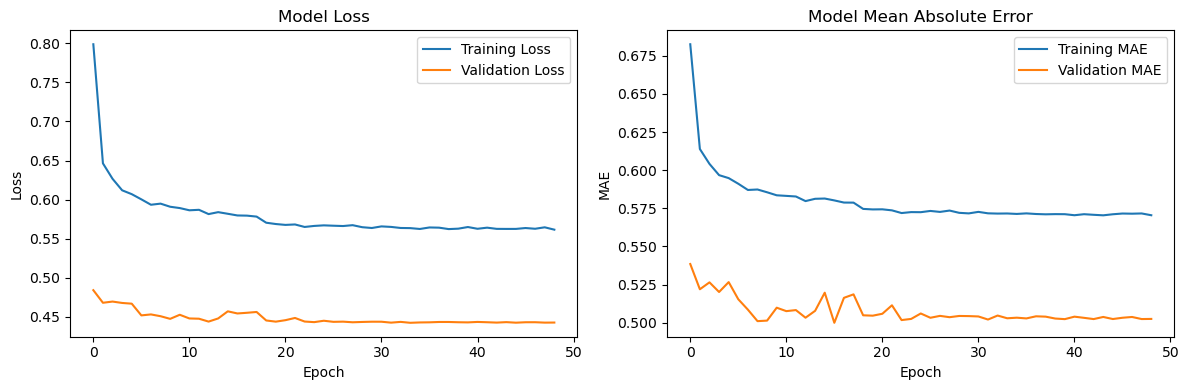

In [36]:
def prepare_multi_player_sequences(df, features, sequence_length, min_games_per_player=10):
    """
    Prepare time series sequences for multiple players
    
    Args:
    - df: DataFrame with player game-level data
    - features: List of feature columns to use
    - sequence_length: Number of previous games to use for prediction
    - min_games_per_player: Minimum games a player must have to be included
    
    Returns:
    - X: Input sequences
    - y: Target sequences
    - scaler: Feature scaler
    """
    # Sort data chronologically for each player
    df_sorted = df.sort_values(['PLAYER_ID', 'GAME_ID'])
    
    # Filter players with sufficient game history
    player_game_counts = df_sorted['PLAYER_ID'].value_counts()
    valid_players = player_game_counts[player_game_counts >= min_games_per_player].index
    
    df_filtered = df_sorted[df_sorted['PLAYER_ID'].isin(valid_players)]
    
    # Standardize features across ALL players
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df_filtered[features])
    
    # Prepare sequences
    sequences_X, sequences_y = [], []
    
    for player_id in valid_players:
        player_data = scaled_features[df_filtered['PLAYER_ID'] == player_id]
        
        # Create sequences for this player
        for i in range(len(player_data) - sequence_length):
            sequences_X.append(player_data[i:i+sequence_length])
            sequences_y.append(player_data[i+sequence_length])
    
    return (np.array(sequences_X), 
            np.array(sequences_y), 
            scaler)

def create_lstm_model(sequence_length, num_features):
    """
    Create LSTM model for time series prediction
    
    Args:
    - sequence_length: Number of time steps in input sequence
    - num_features: Number of features to predict
    
    Returns:
    - Compiled Keras model
    """
    model = Sequential([
        LSTM(64, 
             input_shape=(sequence_length, num_features), 
             return_sequences=True,
             activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        
        LSTM(32, return_sequences=False),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(num_features)
    ])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='mean_squared_error',
        metrics=['mae']
    )
    
    return model

def train_time_series_model(X, y, test_size=0.2, epochs=100):
    """
    Train and evaluate time series model
    
    Args:
    - X: Input sequences
    - y: Target sequences
    - test_size: Proportion of data for validation
    - epochs: Maximum training epochs
    
    Returns:
    - Trained model
    - Training history
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, shuffle=False
    )
    
    # Model and callbacks
    model = create_lstm_model(X.shape[1], X.shape[2])
    
    early_stopping = EarlyStopping(
        monitor='val_loss', 
        patience=15, 
        restore_best_weights=True
    )
    
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss', 
        factor=0.2, 
        patience=5, 
        min_lr=0.00001
    )
    
    # Train model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=epochs,
        batch_size=32,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )
    
    return model, history


features = ['PTS', 'REB', 'AST', 'MIN', 'FGA', 'FG3A', 'FTA', 'TOV']
sequence_length = 10

# Prepare sequences
X, y, scaler = prepare_multi_player_sequences(
    df, 
    features=features, 
    sequence_length=sequence_length,
    min_games_per_player=40  # Adjust based on your dataset
)

# Train model
model, history = train_time_series_model(X, y)

# Optional: Visualization of training
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

/Users/jamesstevens/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
613/613 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9969 - mae: 0.7551 - val_loss: 0.4169 - val_mae: 0.5164 - learning_rate: 0.0010
Epoch 2/100
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6669 - mae: 0.6230 - val_loss: 0.3816 - val_mae: 0.4751 - learning_rate: 0.0010
Epoch 3/100
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6360 - mae: 0.6092 - val_loss: 0.3787 - val_mae: 0.4727 - learning_rate: 0.0010
Epoch 4/100
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6238 - mae: 0.6005 - val_loss: 0.3934 - val_mae: 0.4930 - learning_rate: 0.0010
Epoch 5/100
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6195 - mae: 0.5997 - val_loss: 0.3747 - val_mae: 0.4717 - learning_rate: 0.0010
Epoch 6/100
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6133 - mae: 0.5966 - val_loss: 0.3979 - val_mae: 0.5010 - learning_rate: 0.0010
Epoch 7/100
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6055 - mae: 0.5934 - val_loss: 0.3728 - val_mae: 0.4681 - learning_rate: 0.0010

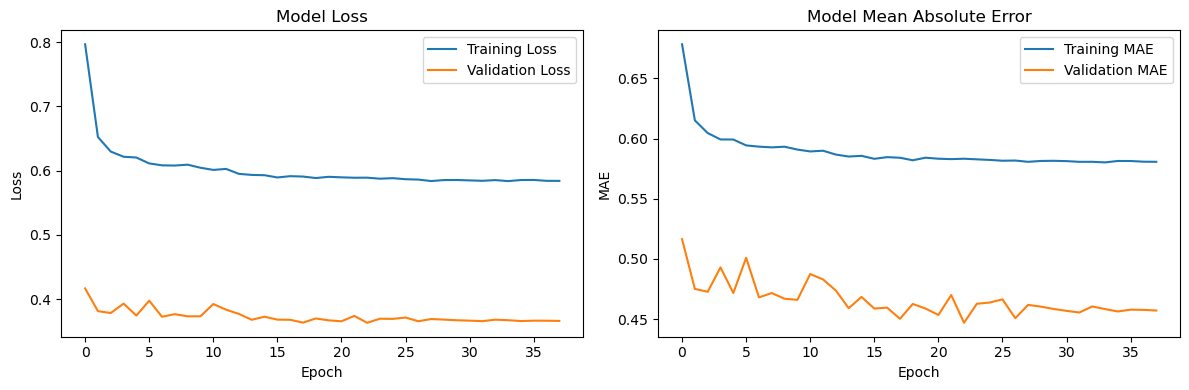

In [40]:
def prepare_multi_player_sequences(df, features, sequence_length, min_games_per_player=10):
    """
    Prepare time series sequences for multiple players
    
    Args:
    - df: DataFrame with player game-level data
    - features: List of feature columns to use
    - sequence_length: Number of previous games to use for prediction
    - min_games_per_player: Minimum games a player must have to be included
    
    Returns:
    - X: Input sequences
    - y: Target sequences
    - scaler: Feature scaler
    """
    # Sort data chronologically for each player
    df_sorted = df.sort_values(['PLAYER_ID', 'GAME_ID'])
    
    # Filter players with sufficient game history
    player_game_counts = df_sorted['PLAYER_ID'].value_counts()
    valid_players = player_game_counts[player_game_counts >= min_games_per_player].index
    
    df_filtered = df_sorted[df_sorted['PLAYER_ID'].isin(valid_players)]
    
    # Standardize features across ALL players
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df_filtered[features])
    
    # Prepare sequences
    sequences_X, sequences_y = [], []
    
    for player_id in valid_players:
        player_data = scaled_features[df_filtered['PLAYER_ID'] == player_id]
        
        # Create sequences for this player
        for i in range(len(player_data) - sequence_length):
            sequences_X.append(player_data[i:i+sequence_length])
            sequences_y.append(player_data[i+sequence_length])
    
    return (np.array(sequences_X), 
            np.array(sequences_y), 
            scaler)

def create_lstm_model(sequence_length, num_features):
    """
    Create LSTM model for time series prediction
    
    Args:
    - sequence_length: Number of time steps in input sequence
    - num_features: Number of features to predict
    
    Returns:
    - Compiled Keras model
    """
    model = Sequential([
        LSTM(64, 
             input_shape=(sequence_length, num_features), 
             return_sequences=True,
             activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        
        LSTM(32, return_sequences=False),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(num_features)
    ])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='mean_squared_error',
        metrics=['mae']
    )
    
    return model

def train_time_series_model(X, y, test_size=0.2, epochs=100):
    """
    Train and evaluate time series model
    
    Args:
    - X: Input sequences
    - y: Target sequences
    - test_size: Proportion of data for validation
    - epochs: Maximum training epochs
    
    Returns:
    - Trained model
    - Training history
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, shuffle=False
    )
    
    # Model and callbacks
    model = create_lstm_model(X.shape[1], X.shape[2])
    
    early_stopping = EarlyStopping(
        monitor='val_loss', 
        patience=15, 
        restore_best_weights=True
    )
    
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss', 
        factor=0.2, 
        patience=5, 
        min_lr=0.00001
    )
    
    # Train model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=epochs,
        batch_size=32,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )
    
    return model, history


features = ['PTS', 'REB', 'AST', 'MIN', 'FGA', 'FG3A', 'FTA', 'TOV']
sequence_length = 3

# Prepare sequences
X, y, scaler = prepare_multi_player_sequences(
    df, 
    features=features, 
    sequence_length=sequence_length,
    min_games_per_player=10  # Adjust based on your dataset
)

# Train model
model, history = train_time_series_model(X, y)

# Optional: Visualization of training
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [58]:
# Ensure that you call `train_time_series_model` to get the split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Now make predictions on the test set
y_pred = model.predict(X_test)


154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Epoch 1/100


/Users/jamesstevens/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


613/613 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9125 - mae: 0.7294 - val_loss: 0.4229 - val_mae: 0.5254 - learning_rate: 0.0010
Epoch 2/100
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6561 - mae: 0.6171 - val_loss: 0.4070 - val_mae: 0.5070 - learning_rate: 0.0010
Epoch 3/100
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6325 - mae: 0.6048 - val_loss: 0.3864 - val_mae: 0.4835 - learning_rate: 0.0010
Epoch 4/100
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6163 - mae: 0.5977 - val_loss: 0.3750 - val_mae: 0.4637 - learning_rate: 0.0010
Epoch 5/100
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6198 - mae: 0.5985 - val_loss: 0.3841 - val_mae: 0.4851 - learning_rate: 0.0010
Epoch 6/100
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6038 - mae: 0.5919 - val_loss: 0.3675 - val_mae: 0.4473 - learning_rate: 0.0010
Epoch 7/100
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6050 - mae: 0.5904 - val_loss: 0.3694 - val_mae: 0.4587 - learning_rate: 0.0010
Epoch 8/100

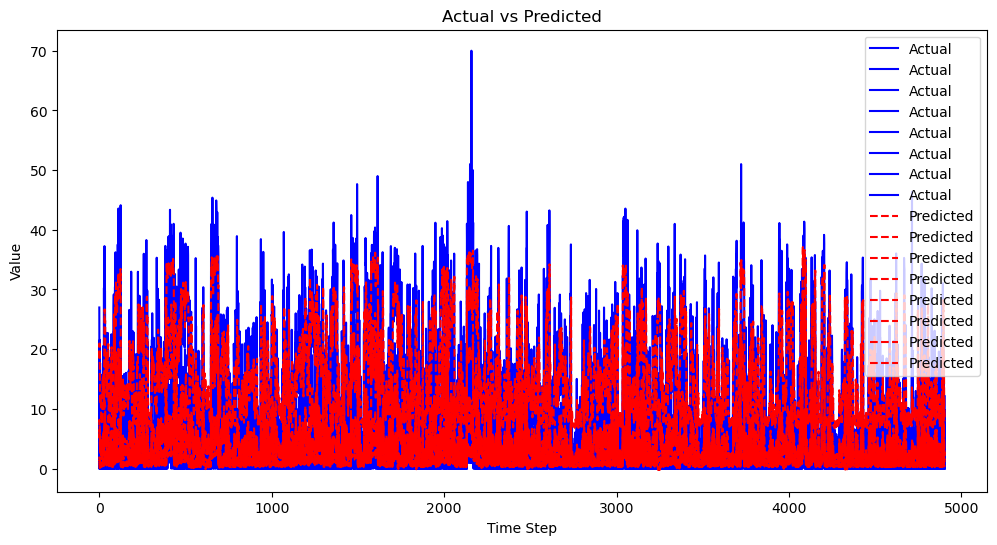

In [60]:
# After training the model
model, history = train_time_series_model(X, y)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Rescale the predictions and actual targets
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Calculate MAE and RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Visualization of predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot actual vs predicted values
plt.plot(y_test_rescaled, label='Actual', color='blue')
plt.plot(y_pred_rescaled, label='Predicted', color='red', linestyle='dashed')

plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


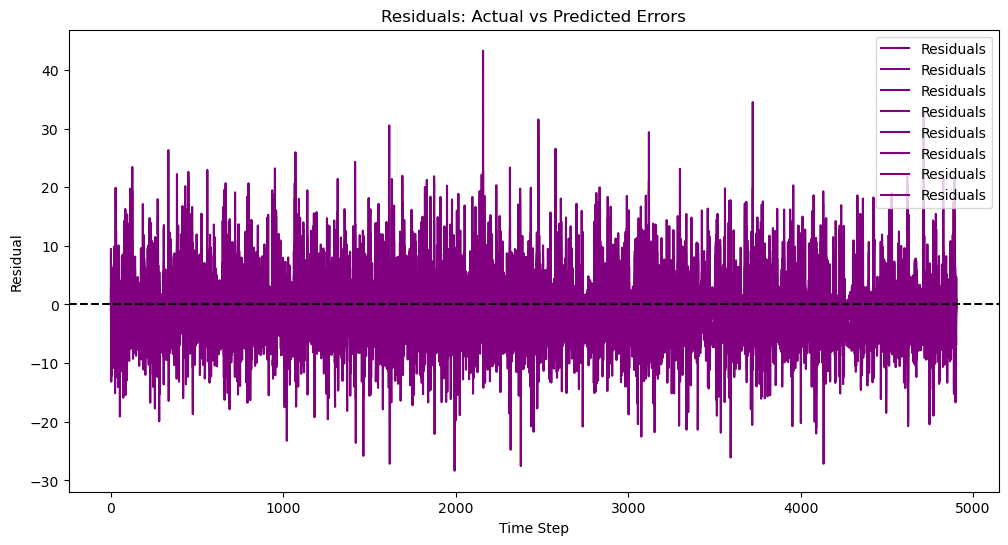

In [62]:
# Residuals: difference between actual and predicted values
residuals = y_test_rescaled - y_pred_rescaled

plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals', color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Residual')
plt.title('Residuals: Actual vs Predicted Errors')
plt.legend()
plt.show()


In [72]:
y_test_rescaled[3]/y_pred_rescaled[3]
y_test_rescaled[3],y_pred_rescaled[3]

(array([ 4.        ,  4.        ,  1.        , 21.56666667,  7.        ,
         0.        ,  0.        ,  2.        ]),
 array([ 6.1024113 ,  5.4845433 ,  0.88429546, 15.261808  ,  3.994402  ,
         0.07231791,  1.6246116 ,  0.721647  ], dtype=float32))

In [72]:
y_test_rescaled[3]/y_pred_rescaled[3]
y_test_rescaled[3],y_pred_rescaled[3]

(array([ 4.        ,  4.        ,  1.        , 21.56666667,  7.        ,
         0.        ,  0.        ,  2.        ]),
 array([ 6.1024113 ,  5.4845433 ,  0.88429546, 15.261808  ,  3.994402  ,
         0.07231791,  1.6246116 ,  0.721647  ], dtype=float32))

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step


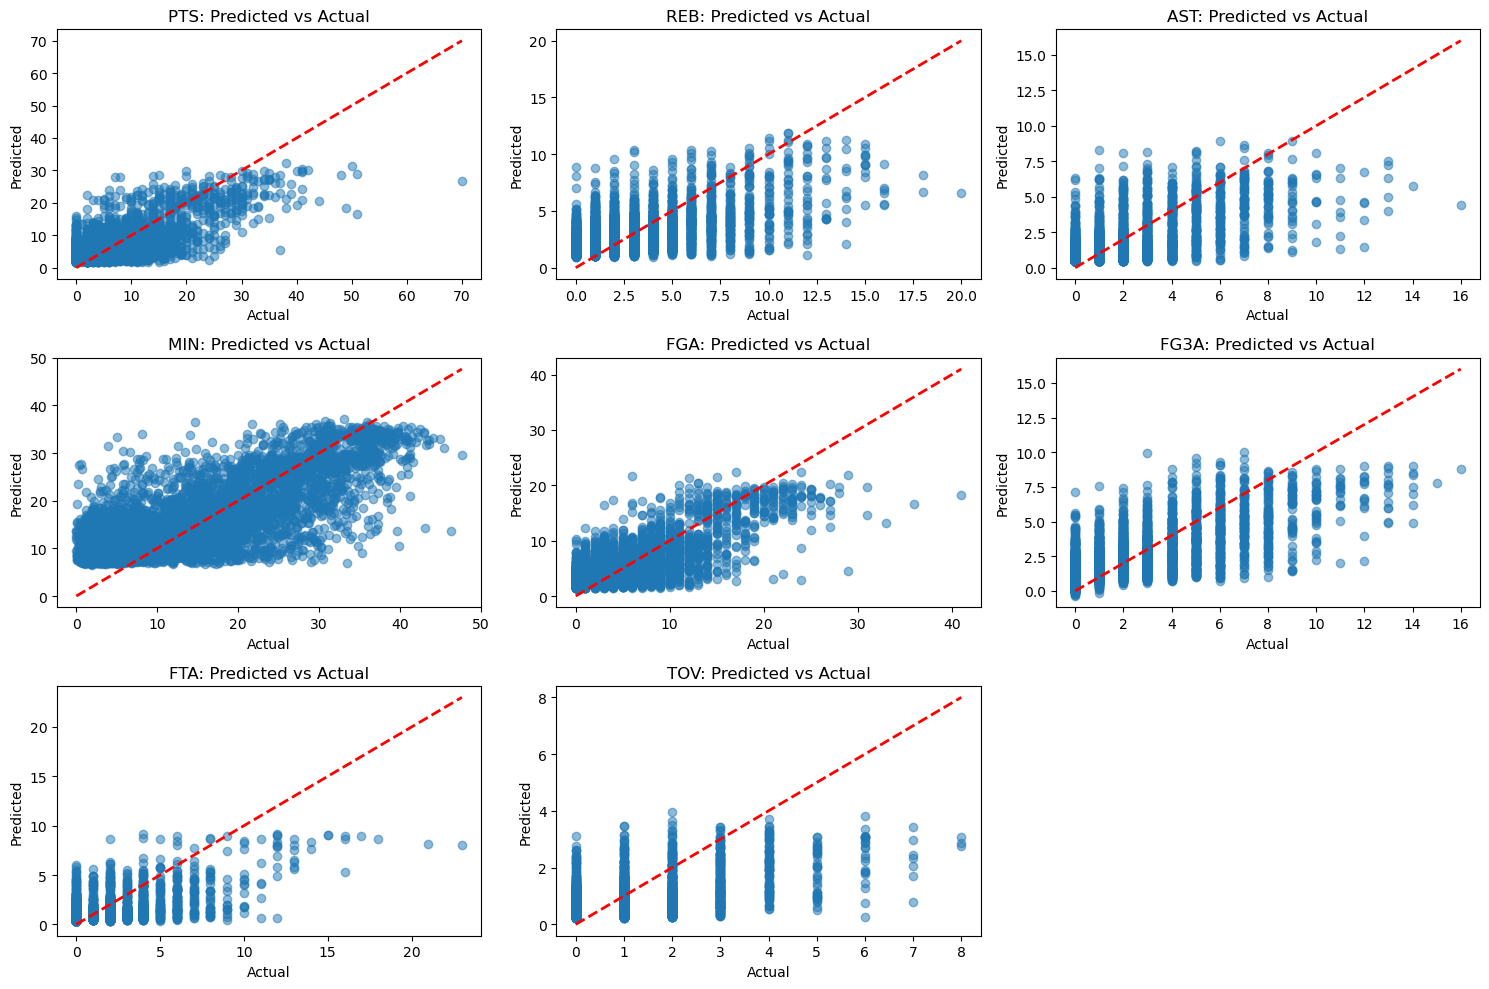

Detailed Feature-wise Metrics:

PTS:
  MAE: 3.8218
  MSE: 25.3366
  RMSE: 5.0335
  R2: 0.4966

REB:
  MAE: 1.7169
  MSE: 5.0290
  RMSE: 2.2425
  R2: 0.3524

AST:
  MAE: 1.0946
  MSE: 2.2954
  RMSE: 1.5151
  R2: 0.4102

MIN:
  MAE: 5.8493
  MSE: 52.8333
  RMSE: 7.2687
  R2: 0.5436

FGA:
  MAE: 2.4962
  MSE: 10.8723
  RMSE: 3.2973
  R2: 0.5752

FG3A:
  MAE: 1.3133
  MSE: 3.0856
  RMSE: 1.7566
  R2: 0.5116

FTA:
  MAE: 1.1982
  MSE: 2.7581
  RMSE: 1.6608
  R2: 0.3486

TOV:
  MAE: 0.6915
  MSE: 0.8572
  RMSE: 0.9258
  R2: 0.3224


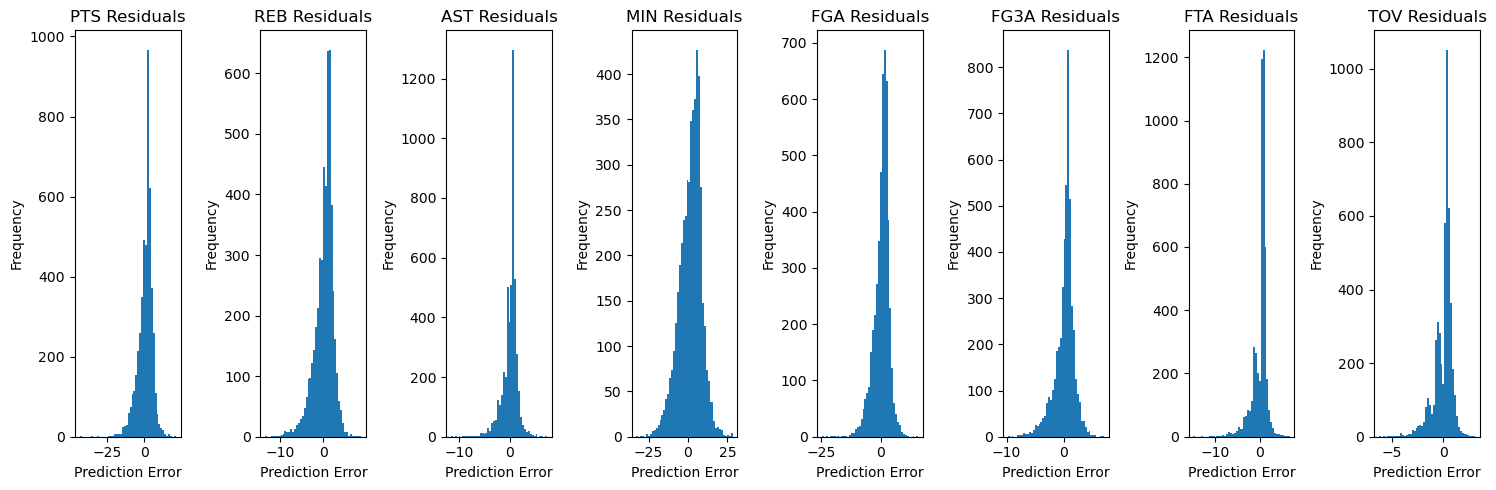

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model_predictions(model, X_test, y_test, scaler, features):
    """
    Comprehensive model evaluation function
    
    Args:
    - model: Trained LSTM model
    - X_test: Test input sequences
    - y_test: Test target sequences
    - scaler: Feature scaler used during preprocessing
    - features: List of feature names
    
    Returns:
    - Detailed evaluation metrics and visualizations
    """
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Inverse transform predictions and actual values
    y_pred_original = scaler.inverse_transform(y_pred)
    y_test_original = scaler.inverse_transform(y_test)
    
    # Compute evaluation metrics for each feature
    metrics = {}
    for i, feature in enumerate(features):
        mae = mean_absolute_error(y_test_original[:, i], y_pred_original[:, i])
        mse = mean_squared_error(y_test_original[:, i], y_pred_original[:, i])
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test_original[:, i], y_pred_original[:, i])
        
        metrics[feature] = {
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R2': r2
        }
    
    # Visualization: Predicted vs Actual for each feature
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features):
        plt.subplot(3, 3, i+1)
        plt.scatter(y_test_original[:, i], y_pred_original[:, i], alpha=0.5)
        plt.plot([y_test_original[:, i].min(), y_test_original[:, i].max()], 
                 [y_test_original[:, i].min(), y_test_original[:, i].max()], 
                 'r--', lw=2)
        plt.title(f'{feature}: Predicted vs Actual')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed metrics
    print("Detailed Feature-wise Metrics:")
    for feature, metric in metrics.items():
        print(f"\n{feature}:")
        for metric_name, value in metric.items():
            print(f"  {metric_name}: {value:.4f}")
    
    # Residual plot for overall performance
    residuals = y_pred_original - y_test_original
    plt.figure(figsize=(15, 5))
    for i, feature in enumerate(features):
        plt.subplot(1, len(features), i+1)
        plt.hist(residuals[:, i], bins=50)
        plt.title(f'{feature} Residuals')
        plt.xlabel('Prediction Error')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    
    return metrics, y_pred_original, y_test_original

# Prepare test data (same as in training script)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Evaluate the model
evaluation_metrics, predictions, actual = evaluate_model_predictions(
    model, X_test, y_test, scaler, features
)

In [78]:
def evaluate_by_player_segment(model, X_test, y_test, scaler, features, df_test):
    """
    Evaluate model performance across different player segments
    """
    y_pred = model.predict(X_test)
    y_pred_original = scaler.inverse_transform(y_pred)
    y_test_original = scaler.inverse_transform(y_test)
    
    # Example: Segment by total minutes played
    df_test['avg_minutes'] = df_test.groupby('PLAYER_ID')['MIN'].transform('mean')
    segments = pd.cut(df_test['avg_minutes'], bins=3, labels=['Low', 'Medium', 'High'])
    
    for segment in ['Low', 'Medium', 'High']:
        mask = segments == segment
        segment_pred = y_pred_original[mask]
        segment_actual = y_test_original[mask]
        
        print(f"\n{segment} Minutes Players:")
        for i, feature in enumerate(features):
            mae = mean_absolute_error(segment_actual[:, i], segment_pred[:, i])
            print(f"  {feature} MAE: {mae:.4f}")

In [80]:
def prediction_intervals(y_pred, y_test, confidence=0.95):
    """
    Calculate prediction intervals
    """
    errors = np.abs(y_pred - y_test)
    interval = np.percentile(errors, [50, confidence * 100], axis=0)
    return interval

In [82]:
# First, recreate the test split (since it wasn't saved in the previous run)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Function to evaluate by player segment
def evaluate_by_player_segment(model, X_test, y_test, scaler, features, df):
    """
    Evaluate model performance across different player segments
    """
    y_pred = model.predict(X_test)
    y_pred_original = scaler.inverse_transform(y_pred)
    y_test_original = scaler.inverse_transform(y_test)
    
    # Create a temporary dataframe for this analysis
    # You'll need to modify this based on your actual dataframe structure
    temp_df = df.iloc[len(df) - len(y_test):].copy()
    
    # Segment by total minutes played
    temp_df['avg_minutes'] = temp_df.groupby('PLAYER_ID')['MIN'].transform('mean')
    
    # Create segments
    temp_df['minute_segment'] = pd.cut(
        temp_df['avg_minutes'], 
        bins=3, 
        labels=['Low', 'Medium', 'High']
    )
    
    print("Performance by Player Minute Segments:")
    for segment in ['Low', 'Medium', 'High']:
        print(f"\n{segment} Minutes Players:")
        
        # Find indices for this segment
        segment_indices = temp_df['minute_segment'] == segment
        
        segment_pred = y_pred_original[segment_indices]
        segment_actual = y_test_original[segment_indices]
        
        for i, feature in enumerate(features):
            if len(segment_pred) > 0:
                mae = mean_absolute_error(segment_actual[:, i], segment_pred[:, i])
                print(f"  {feature} MAE: {mae:.4f}")
            else:
                print(f"  {feature}: No data in this segment")

# Function for prediction intervals
def prediction_intervals(y_pred, y_test, features, confidence=0.95):
    """
    Calculate prediction intervals
    """
    print("\nPrediction Intervals:")
    errors = np.abs(y_pred - y_test)
    
    for i, feature in enumerate(features):
        # Calculate intervals
        lower = np.percentile(errors[:, i], (1 - confidence) / 2 * 100)
        median = np.percentile(errors[:, i], 50)
        upper = np.percentile(errors[:, i], (1 + confidence) * 100 / 2)
        
        print(f"\n{feature}:")
        print(f"  {confidence*100}% Prediction Interval:")
        print(f"    Lower bound: {lower:.4f}")
        print(f"    Median error: {median:.4f}")
        print(f"    Upper bound: {upper:.4f}")

# Run the additional analyses
# Note: You might need to adjust 'df' to your original dataframe
print("\n--- Player Segment Analysis ---")
evaluate_by_player_segment(model, X_test, y_test, scaler, features, df)

print("\n--- Prediction Intervals ---")
prediction_intervals(
    scaler.inverse_transform(model.predict(X_test)), 
    scaler.inverse_transform(y_test), 
    features
)


--- Player Segment Analysis ---
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step
Performance by Player Minute Segments:

Low Minutes Players:
  PTS MAE: 3.7613
  REB MAE: 1.6286
  AST MAE: 1.1035
  MIN MAE: 5.8014
  FGA MAE: 2.5024
  FG3A MAE: 1.3328
  FTA MAE: 1.1699
  TOV MAE: 0.6918

Medium Minutes Players:
  PTS MAE: 3.8911
  REB MAE: 1.7815
  AST MAE: 1.0913
  MIN MAE: 6.0248
  FGA MAE: 2.5555
  FG3A MAE: 1.3072
  FTA MAE: 1.2020
  TOV MAE: 0.6725

High Minutes Players:
  PTS MAE: 3.7750
  REB MAE: 1.7037
  AST MAE: 1.0911
  MIN MAE: 5.6295
  FGA MAE: 2.4004
  FG3A MAE: 1.3039
  FTA MAE: 1.2197
  TOV MAE: 0.7201

--- Prediction Intervals ---
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step

Prediction Intervals:

PTS:
  95.0% Prediction Interval:
    Lower bound: 0.1366
    Median error: 3.0049
    Upper bound: 12.4387

REB:
  95.0% Prediction Interval:
    Lower bound: 0.0803
    Median error: 1.3770
    Upper bound: 5.5253

AST:
  95.0% Prediction Interval:
    Lower bound: 0.0622
    Medi

In [52]:
# model.predict([[32,6,36,17,4,11,4],[16,9,6,22,11,6,2,4],[35,5,9,34,22,9,6,3]])
# model.predict(X[0])
print(X)

[[[ 0.36182728  0.26278723 -0.19069314 ...  1.20802729 -0.74024945
   -0.15495439]
  [-0.97392126 -0.60168525 -0.5655366  ... -0.09906188 -0.74024945
    2.75873711]
  [ 1.47495107 -0.60168525 -0.5655366  ...  0.881255   -0.74024945
   -0.15495439]]

 [[-0.97392126 -0.60168525 -0.5655366  ... -0.09906188 -0.74024945
    2.75873711]
  [ 1.47495107 -0.60168525 -0.5655366  ...  0.881255   -0.74024945
   -0.15495439]
  [ 0.8070768  -0.02537027 -0.94038006 ...  0.881255    0.34629265
   -0.88337727]]

 [[ 1.47495107 -0.60168525 -0.5655366  ...  0.881255   -0.74024945
   -0.15495439]
  [ 0.8070768  -0.02537027 -0.94038006 ...  0.881255    0.34629265
   -0.88337727]
  [ 0.36182728 -0.60168525  0.93383723 ...  1.20802729 -0.74024945
   -0.15495439]]

 ...

 [[-1.19654601 -0.88984275 -0.94038006 ... -0.75260647 -0.74024945
   -0.88337727]
  [-1.19654601 -1.17800024 -0.94038006 ... -0.42583417 -0.74024945
   -0.88337727]
  [-0.86260888 -1.17800024 -0.94038006 ... -0.42583417 -0.74024945
   -0.88

In [10]:
features = ['PTS', 'REB', 'AST', 'MIN', 'FGA', 'FG3A', 'FTA', 'TOV']
target = ['PTS', 'REB', 'AST', 'MIN', 'FGA', 'FG3A', 'FTA', 'TOV']  # Or ['PTS', 'REB'] for multi-target
sequence_length = 5

# Assuming 'group' is a DataFrame filtered by PLAYER_ID or GAME_ID
group = df[df['PLAYER_ID'] == 2544]  # Example filter
print(group[['PTS', 'REB', 'AST', 'MIN', 'FGA', 'FG3A', 'FTA', 'TOV']].iloc[:5])

   PTS  REB  AST        MIN  FGA  FG3A  FTA  TOV
0   32   11    6  36.383333   17     4   11    4
1   16    9    6  22.650000   11     6    2    4
2   35    5    9  34.533333   22     9    6    3
3   17    7    9  24.016667   10     5    2    2
4   21    8    5  29.010000   16     4    1    0


In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def prepare_time_series_data(df, features, sequence_length):
    """
    Prepare time series data for LSTM prediction
    
    Parameters:
    - df: DataFrame with time-ordered player statistics
    - features: List of feature column names
    - sequence_length: Number of previous games to use for prediction
    
    Returns:
    - X: Input sequences
    - y: Next game predictions
    - feature_scaler: Scaler for features
    """
    # Ensure data is sorted chronologically
    df = df.sort_index()
    
    # Scale features
    feature_scaler = StandardScaler()
    scaled_data = feature_scaler.fit_transform(df[features])
    
    # Prepare sequences
    X, y = [], []
    for i in range(len(scaled_data) - sequence_length):
        # Input sequence: previous 'sequence_length' games
        X.append(scaled_data[i:i+sequence_length])
        # Target: next game's stats
        y.append(scaled_data[i+sequence_length])
    
    return np.array(X), np.array(y), feature_scaler

def create_lstm_model(input_shape, num_features):
    """
    Create LSTM model for time series prediction
    
    Parameters:
    - input_shape: Shape of input sequences
    - num_features: Number of features to predict
    
    Returns:
    - Compiled Keras model
    """
    model = Sequential([
        # First LSTM layer with return_sequences to allow stacking
        LSTM(64, input_shape=input_shape, return_sequences=True, 
             activation='relu'),
        Dropout(0.2),
        
        # Second LSTM layer
        LSTM(32, activation='relu'),
        Dropout(0.2),
        
        # Dense layers for output
        Dense(64, activation='relu'),
        Dropout(0.1),
        Dense(num_features)  # Output layer with same number of features
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='mean_squared_error',
                  metrics=['mae'])
    
    return model

def train_and_evaluate_model(X, y, test_split=0.2, epochs=50, batch_size=32):
    """
    Train and evaluate LSTM model
    
    Parameters:
    - X: Input sequences
    - y: Target sequences
    - test_split: Proportion of data for validation
    - epochs: Number of training epochs
    - batch_size: Batch size for training
    
    Returns:
    - Trained model
    - Training history
    """
    # Split data
    split_idx = int(len(X) * (1 - test_split))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
    
    # Create model
    model = create_lstm_model(
        input_shape=(X.shape[1], X.shape[2]), 
        num_features=X.shape[2]
    )
    
    # Train model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )
    
    return model, history

# Example usage
def predict_next_game(model, last_sequences, scaler):
    """
    Predict next game's statistics
    
    Parameters:
    - model: Trained LSTM model
    - last_sequences: Scaled sequences of previous games
    - scaler: Feature scaler for inverse transformation
    
    Returns:
    - Predicted statistics for next game
    """
    prediction_scaled = model.predict(last_sequences)
    prediction = scaler.inverse_transform(prediction_scaled)
    return prediction

# Main execution (placeholder)
group = df[df['PLAYER_ID'] == 2544]
features = ['PTS', 'REB', 'AST', 'MIN', 'FGA', 'FG3A', 'FTA', 'TOV']
X, y, scaler = prepare_time_series_data(group, features, sequence_length=5)
model, history = train_and_evaluate_model(X, y)

Epoch 1/50


/Users/jamesstevens/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 0.9380 - mae: 0.7520 - val_loss: 1.1656 - val_mae: 0.8278
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9380 - mae: 0.7623 - val_loss: 1.1678 - val_mae: 0.8284
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9160 - mae: 0.7430 - val_loss: 1.1711 - val_mae: 0.8293
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9196 - mae: 0.7442 - val_loss: 1.1748 - val_mae: 0.8305
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9544 - mae: 0.7634 - val_loss: 1.1790 - val_mae: 0.8319
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9503 - mae: 0.7596 - val_loss: 1.1846 - val_mae: 0.8336
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8976 - mae: 0.7450 - val_loss: 1.1909 - val_mae: 0.8356
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9098 - mae: 0.7397 - val_loss: 1.1981 - val_mae: 0.8378
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9097 - mae: 0.7400 - val_loss: 

In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

def prepare_time_series_data(df, features, sequence_length):
    """
    Prepare time series data for LSTM prediction
    
    Parameters:
    - df: DataFrame with time-ordered player statistics
    - features: List of feature column names
    - sequence_length: Number of previous games to use for prediction
    
    Returns:
    - X: Input sequences
    - y: Next game predictions
    - feature_scaler: Scaler for features
    """
    # Ensure data is sorted chronologically
    df = df.sort_index()
    
    # Scale features
    feature_scaler = StandardScaler()
    scaled_data = feature_scaler.fit_transform(df[features])
    
    # Prepare sequences
    X, y = [], []
    for i in range(len(scaled_data) - sequence_length):
        # Input sequence: previous 'sequence_length' games
        X.append(scaled_data[i:i+sequence_length])
        # Target: next game's stats
        y.append(scaled_data[i+sequence_length])
    
    return np.array(X), np.array(y), feature_scaler

def create_lstm_model(sequence_length, num_features):
    """
    Create LSTM model for time series prediction
    
    Parameters:
    - sequence_length: Number of time steps in input sequence
    - num_features: Number of features to predict
    
    Returns:
    - Compiled Keras model
    """
    model = Sequential([
        # First LSTM layer with return_sequences to allow stacking
        LSTM(64, 
             input_shape=(sequence_length, num_features), 
             return_sequences=True, 
             activation='relu',
             kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        
        # Second LSTM layer
        LSTM(32, 
             activation='relu',
             kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        
        # Dense layers for output
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.2),
        Dense(num_features)  # Output layer with same number of features
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='mean_squared_error',
                  metrics=['mae'])
    
    return model

def train_and_evaluate_model(X, y, test_split=0.2, epochs=200, batch_size=32):
    """
    Train and evaluate LSTM model
    
    Parameters:
    - X: Input sequences
    - y: Target sequences
    - test_split: Proportion of data for validation
    - epochs: Maximum number of training epochs
    - batch_size: Batch size for training
    
    Returns:
    - Trained model
    - Training history
    """
    # Split data
    split_idx = int(len(X) * (1 - test_split))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
    
    # Get sequence and feature dimensions
    sequence_length = X.shape[1]
    num_features = X.shape[2]
    
    # Create model
    model = create_lstm_model(
        sequence_length=sequence_length, 
        num_features=num_features
    )
    
    # Callbacks
    early_stopping = EarlyStopping(
        monitor='val_loss', 
        patience=10, 
        restore_best_weights=True
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss', 
        factor=0.2, 
        patience=5, 
        min_lr=0.00001
    )
    
    # Train model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )
    
    return model, history

# Example usage (you would replace this with your actual data)
# Assuming 'df' is your DataFrame
features = ['PTS', 'REB', 'AST', 'MIN', 'FGA', 'FG3A', 'FTA', 'TOV']
sequence_length = 5
X, y, scaler = prepare_time_series_data(group, features, sequence_length)
model, history = train_and_evaluate_model(X, y)

Epoch 1/200


/Users/jamesstevens/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 1.0332 - mae: 0.7463 - val_loss: 1.3012 - val_mae: 0.8298 - learning_rate: 0.0010
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0944 - mae: 0.7664 - val_loss: 1.3014 - val_mae: 0.8311 - learning_rate: 0.0010
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0658 - mae: 0.7565 - val_loss: 1.3009 - val_mae: 0.8320 - learning_rate: 0.0010
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0324 - mae: 0.7461 - val_loss: 1.2998 - val_mae: 0.8327 - learning_rate: 0.0010
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0360 - mae: 0.7460 - val_loss: 1.2985 - val_mae: 0.8334 - learning_rate: 0.0010
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0275 - mae: 0.7527 - val_loss: 1.2972 - val_mae: 0.8340 - learning_rate: 0.0010
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0462 - mae: 0.7518 - val_loss: 1.2961 - val_mae: 0.8345 - learning_rate: 0.0010
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━

In [20]:
# Check data characteristics
print("Total sequences:", len(X))
print("Sequence length:", X.shape[1])
print("Number of features:", X.shape[2])

# Check for data variability
print("\nFeature statistics:")
for i, feature in enumerate(features):
    print(f"{feature}:")
    print("  Mean variation:", np.std(X[:,:,i]))

Total sequences: 66
Sequence length: 5
Number of features: 8

Feature statistics:
PTS:
  Mean variation: 0.9945742951377228
REB:
  Mean variation: 1.0162385493175465
AST:
  Mean variation: 0.9747011071126785
MIN:
  Mean variation: 0.923825855452296
FGA:
  Mean variation: 0.9725935425751944
FG3A:
  Mean variation: 1.0120609893163073
FTA:
  Mean variation: 0.9900610251771201
TOV:
  Mean variation: 0.9704923427686846


In [22]:
from tensorflow.keras.layers import GRU, BatchNormalization

def create_small_data_model(sequence_length, num_features):
    model = Sequential([
        # Smaller, more regularized architecture
        GRU(32, 
            input_shape=(sequence_length, num_features), 
            return_sequences=False,
            dropout=0.3,
            recurrent_dropout=0.3),
        
        BatchNormalization(),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(num_features)
    ])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(0.001),
        loss='mean_squared_error',
        metrics=['mae']
    )
    
    return model

In [24]:
model, history = train_and_evaluate_model(X, y)

Epoch 1/200


/Users/jamesstevens/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - loss: 1.0846 - mae: 0.7614 - val_loss: 1.2903 - val_mae: 0.8231 - learning_rate: 0.0010
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0710 - mae: 0.7620 - val_loss: 1.2900 - val_mae: 0.8239 - learning_rate: 0.0010
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0666 - mae: 0.7537 - val_loss: 1.2895 - val_mae: 0.8247 - learning_rate: 0.0010
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0728 - mae: 0.7565 - val_loss: 1.2886 - val_mae: 0.8253 - learning_rate: 0.0010
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.0497 - mae: 0.7556 - val_loss: 1.2877 - val_mae: 0.8261 - learning_rate: 0.0010
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.0277 - mae: 0.7446 - val_loss: 1.2866 - val_mae: 0.8266 - learning_rate: 0.0010
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0739 - mae: 0.7625 - val_loss: 1.2854 - val_mae: 0.8271 - learning_rate: 0.0010
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━

In [17]:
# Ensure sequences and targets_values are lists
sequences = []
targets_values = []

# Loop to create sequences and targets
for i in range(len(group) - sequence_length):
    # Extract input sequence (past 5 games)
    seq = group.iloc[i:i+sequence_length][features].values

    # Extract the next game stats as the target
    target_values = group.iloc[i+sequence_length][features].values

    sequences.append(seq)
    targets_values.append(target_values)

# Convert to NumPy arrays after appending for easier model input
sequences = np.array(sequences)
targets_values = np.array(targets_values)

print(f"Shape of sequences: {sequences.shape}")
print(f"Shape of targets: {targets_values.shape}")


Shape of sequences: (66, 5, 8)
Shape of targets: (66, 8)


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sequences, targets_values, test_size=0.2, random_state=42)
